# Data Visualizations


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import mlxtend

from matplotlib import pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap


### Read CSV file containing YouTube video data

In [2]:
# Read CSV file
yt_data = pd.read_csv('../data/youtube_video_data.csv')

# Drop the CSV file's numeric row count/index column
yt_data = yt_data.drop('Unnamed: 0', axis=1)

# Convert 2 date columns into datetime objects
yt_data['video_published_at'] = pd.to_datetime(yt_data['video_published_at'])
yt_data['channel_published_at'] = pd.to_datetime(yt_data['channel_published_at'])

# Output the dataframe
yt_data

,video_id,title,description,video_published_at,hours_published_video,num_tags,channel,channel_id,thumbnail_url,thumbnail_width,...,views,likes,favorites,comments,channel_description,channel_published_at,days_published_channel,channel_views,channel_videos,channel_subscribers
0,WM8bTdBs-cw,Metallica: One (Official Music Video),"Metallica's official music video for “One,” fr...",2009-10-27 01:53:30+00:00,116979.985099,7,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/WM8bTdBs-cw/default.jpg,120,...,279959343,1691453.0,0,76073.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
1,qz8yjPTMJf4,Metallica: Screaming Suicide (Official Lyric V...,"Metallica’s official lyric video, “Screaming S...",2023-01-25 14:01:00+00:00,855.860099,8,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/qz8yjPTMJf4/default.jpg,120,...,278112,12501.0,0,876.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
2,_u-7rWKnVVo,Metallica: Lux Æterna (Official Music Video),Metallica's official music video for “Lux Æter...,2022-11-28 15:00:20+00:00,2246.871210,8,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/_u-7rWKnVVo/default.jpg,120,...,15976078,483175.0,0,46518.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
3,CD-E-LDc384,Metallica: Enter Sandman (Official Music Video),Metallica's official music video for “Enter Sa...,2012-03-19 20:34:06+00:00,95985.308432,7,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/CD-E-LDc384/default.jpg,120,...,578225232,2857927.0,0,81851.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
4,FpF8Wa2yQH0,Metallica: Here Comes Revenge (Official Music ...,Metallica's official music video for “Here Com...,2016-11-17 16:21:09+00:00,55093.524265,6,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/FpF8Wa2yQH0/default.jpg,120,...,13857490,121676.0,0,6225.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,WCQ4TEP2eO4,"The magician turns half human half snake, maki...","The magician turns half human half snake, maki...",2023-02-25 12:28:52+00:00,904.280574,15,MIT Dino,UC1B_7v4Mj2PtCZsy6WHS2Dg,https://i.ytimg.com/vi/WCQ4TEP2eO4/default.jpg,120,...,2398971,25406.0,0,1277.0,NaN,2023-01-07 10:20:19+00:00,86.767645,4751805,43,25500
2320,5rdXveKRRiw,Rey Mysterio WrestleMania 39 Entrance w/ Snoop...,NaN,2023-04-02 02:14:50+00:00,50.514463,0,RhystleMania,UCunQ0LLbcxeCMb4suz55gGQ,https://i.ytimg.com/vi/5rdXveKRRiw/default.jpg,120,...,463926,7595.0,0,456.0,The best YouTube Channel in the world.,2012-05-05 03:24:02+00:00,3986.056731,1403803,479,3890
2321,3aAhwhkAdzw,Brock Lesnar destroza a Cody Rhodes Brutalment...,Recuerda apoyar el Canal Secundario: https://w...,2023-04-04 03:03:39+00:00,1.700852,6,Datos Curiosos del Wrestling,UCwG3qrE4GuIPpOlCMcCHruQ,https://i.ytimg.com/vi/3aAhwhkAdzw/default.jpg,120,...,38515,4455.0,0,1248.0,Datos Curiosos del Wrestling\n\nEste espacio s...,2013-02-16 21:20:30+00:00,3698.309184,109833315,604,227000
2322,1HIhb7A0xX4,The Equalizer | Robert Fights a Russian Gang (...,Robert (Denzel Washington) walks in on an unde...,2022-09-27 16:00:00+00:00,4524.761685,34,Crime City,UC-EAAZq8FySRsFKcc7wMXIA,https://i.ytimg.com/vi/1HIhb7A0xX4/default.jpg,120,...,8077400,48183.0,0,2394.0,You have the right to remain silent... and bin...,2022-07-15 17:03:01+00:00,262.487992,40584176,273,58700


### Describe the dataframe

In [3]:
print("Shape: ", yt_data.shape, "\n")
yt_data.describe()

Shape:  (2324, 24) 



,hours_published_video,num_tags,thumbnail_width,thumbnail_height,duration,views,likes,favorites,comments,days_published_channel,channel_views,channel_videos,channel_subscribers
count,2324.000000,2324.000000,2324.0,2324.0,2324.000000,2.324000e+03,2.317000e+03,2324.0,2.314000e+03,2324.000000,2.324000e+03,2324.000000,2.324000e+03
mean,6826.997513,16.425129,120.0,90.0,1112.746127,8.791074e+06,1.723701e+05,0.0,7.812484e+03,3214.440047,2.713291e+09,3522.989673,7.436841e+06
std,13476.402586,13.672889,0.0,0.0,1623.130122,4.660263e+07,8.638669e+05,0.0,3.684831e+04,1811.512087,8.194447e+09,13889.897328,1.932185e+07
min,0.122241,0.000000,120.0,90.0,0.000000,3.000000e+00,0.000000e+00,0.0,0.000000e+00,9.119690,5.320000e+02,1.000000,1.000000e+00
25%,87.954761,3.000000,120.0,90.0,366.750000,1.836530e+05,5.627000e+03,0.0,3.550000e+02,1770.748490,6.038705e+07,139.000000,3.180000e+05
50%,1375.058253,16.000000,120.0,90.0,746.500000,8.363105e+05,2.502700e+04,0.0,1.399500e+03,3152.131708,3.488710e+08,408.000000,1.410000e+06
75%,7006.279761,26.000000,120.0,90.0,1315.000000,3.268244e+06,8.409100e+04,0.0,4.445750e+03,4386.356472,1.701380e+09,1321.000000,5.892500e+06
max,118343.889463,75.000000,120.0,90.0,43724.000000,1.096776e+09,2.530573e+07,0.0,1.057478e+06,6500.691858,7.526967e+10,244477.000000,1.400000e+08


### Histogram of Views

Text(0, 0.5, '# of Videos')

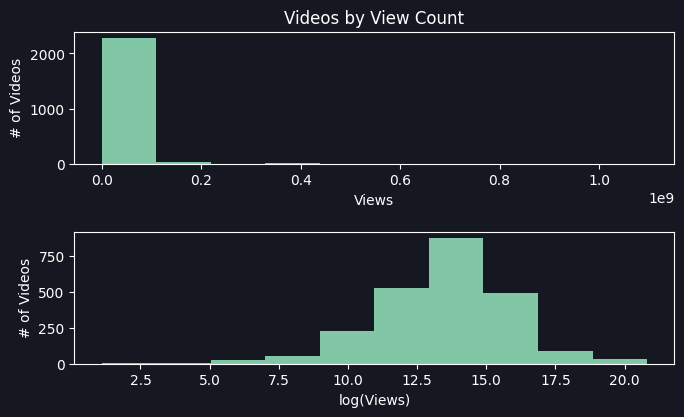

In [4]:
bgcolor = "#151821"
fgcolor = "#ffffff"
barcolor = "#82C7A5"
edgecolor = "#0000ff"

fig = plt.figure(figsize=(6,4), facecolor=bgcolor)

ax = fig.add_axes([0,0.5,1,0.33])
ax.patch.set_facecolor(bgcolor)
ax.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax.spines.values():
    spine.set_edgecolor(fgcolor)    
ax.hist(x=yt_data['views'], facecolor=barcolor)
ax.set_title('Videos by View Count', color=fgcolor)
ax.set_xlabel('Views', color=fgcolor)
ax.set_ylabel('# of Videos', color=fgcolor)

ax = fig.add_axes([0,0,1,0.33])
ax.patch.set_facecolor(bgcolor)
ax.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax.spines.values():
    spine.set_edgecolor(fgcolor)    
ax.hist(x=np.log(yt_data['views']), facecolor=barcolor)
ax.set_xlabel('log(Views)', color=fgcolor)
ax.set_ylabel('# of Videos', color=fgcolor)


### Perform some data transformations

In [5]:
pd.set_option('mode.chained_assignment', None)

yt_data['log_views'] = np.log(yt_data['views'])

yt_data['duration'] = yt_data['duration'].replace(0, np.nan)
yt_data['log_duration'] = np.log(yt_data['duration'])

yt_data['likes'] = yt_data['likes'].replace(0, np.nan)
yt_data['log_likes'] = np.log(yt_data['likes'])

yt_data['comments'] = yt_data['comments'].replace(0, np.nan)
yt_data['log_comments'] = np.log(yt_data['comments'])

yt_data['log_hrs_publ_vid'] = np.log(yt_data['hours_published_video'])
yt_data['log_days_publ_chn'] = np.log(yt_data['days_published_channel'])
yt_data['log_channel_views'] = np.log(yt_data['channel_views'])
yt_data['log_channel_subscribers'] = np.log(yt_data['channel_subscribers'])


### Produce a Scatterplot Matrix

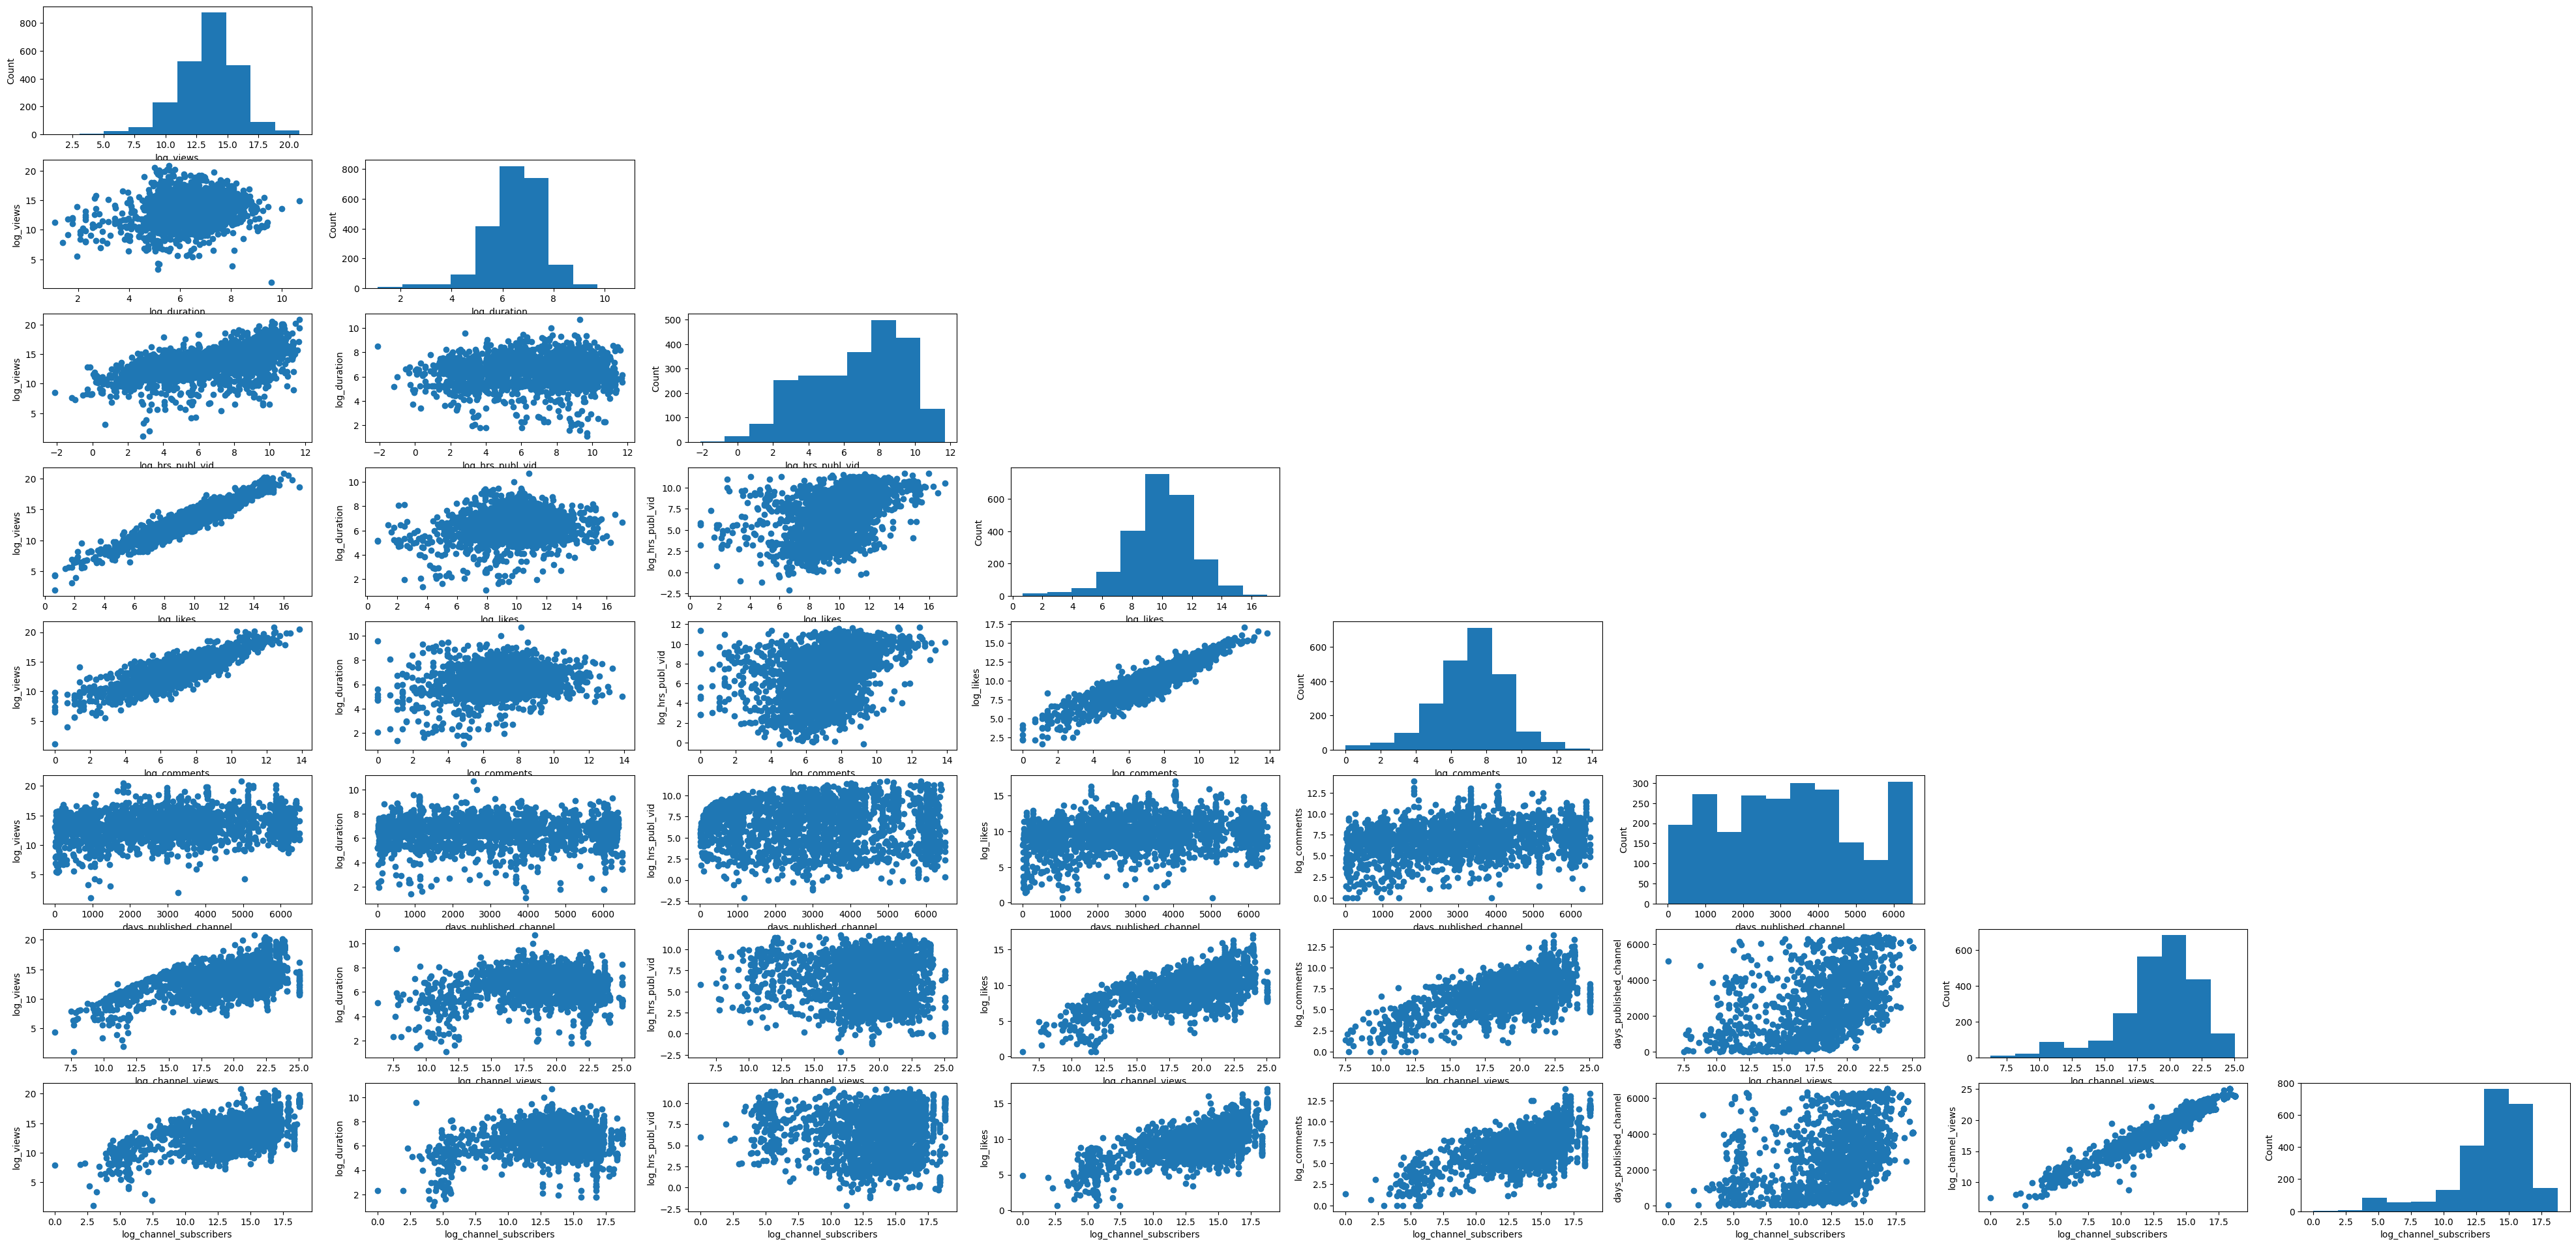

In [6]:
variables = ['log_views', 'log_duration', 'log_hrs_publ_vid', 'log_likes', 'log_comments', 
             'days_published_channel', 'log_channel_views', 'log_channel_subscribers']

scatterplotmatrix(
    yt_data[variables].values,
    names=variables,
    figsize=(50,24), alpha=1
);


### Produce a Correlation Matrix Heatmap

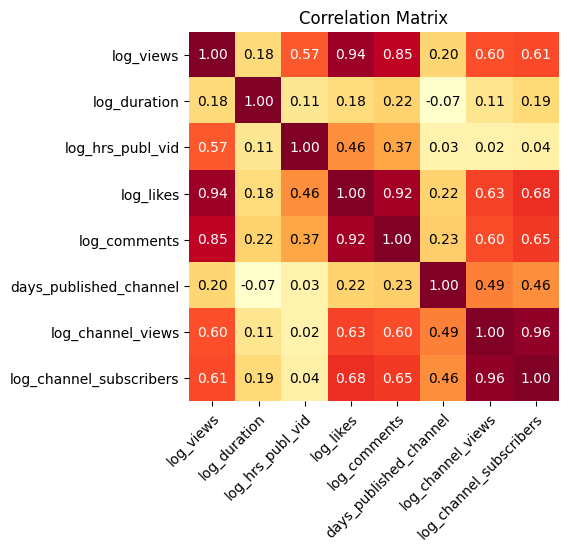

In [7]:
cm = yt_data[variables].corr().values
(fig, ax) = heatmap(cm, row_names=variables, column_names=variables, 
                    cmap="YlOrRd", hide_spines=True, colorbar=False)

ax = ax.set_title("Correlation Matrix")

### Produce some scatterplots (for presentation)

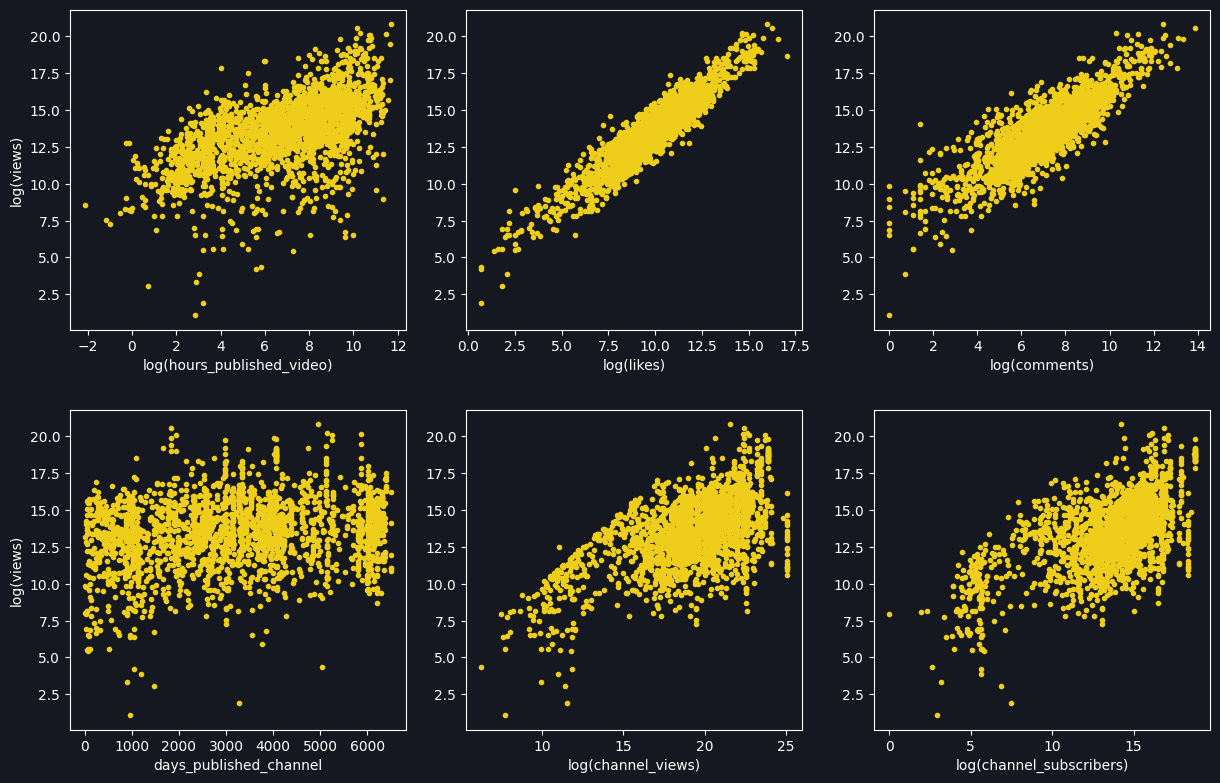

In [9]:
pointcolor = "#eece1a"
fig = plt.figure(figsize=(12,8), facecolor=bgcolor)

ax1 = fig.add_axes([0,0.9,0.28,0.40])
ax1.patch.set_facecolor(bgcolor)
ax1.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax1.spines.values():
    spine.set_edgecolor(fgcolor)    
ax1.scatter(y=yt_data['log_views'], x=yt_data['log_hrs_publ_vid'], marker=".", facecolor=pointcolor)
ax1.set_xlabel('log(hours_published_video)', color=fgcolor)
ax1.set_ylabel('log(views)', color=fgcolor)

ax2 = fig.add_axes([0.33,0.9,0.28,0.40])
ax2.patch.set_facecolor(bgcolor)
ax2.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax2.spines.values():
    spine.set_edgecolor(fgcolor)    
ax2.scatter(y=yt_data['log_views'], x=yt_data['log_likes'], marker=".", facecolor=pointcolor)
ax2.set_xlabel('log(likes)', color=fgcolor)
ax2.sharey(ax1)

ax3 = fig.add_axes([0.67,0.9,0.28,0.40])
ax3.patch.set_facecolor(bgcolor)
ax3.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax3.spines.values():
    spine.set_edgecolor(fgcolor)    
ax3.scatter(y=yt_data['log_views'], x=yt_data['log_comments'], marker=".", facecolor=pointcolor)
ax3.set_xlabel('log(comments)', color=fgcolor)
ax3.sharey(ax1)

ax4 = fig.add_axes([0,0.4,0.28,0.4])
ax4.patch.set_facecolor(bgcolor)
ax4.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax4.spines.values():
    spine.set_edgecolor(fgcolor)    
ax4.scatter(y=yt_data['log_views'], x=yt_data['days_published_channel'], marker=".", facecolor=pointcolor)
ax4.set_xlabel('days_published_channel', color=fgcolor)
ax4.set_ylabel('log(views)', color=fgcolor)

ax5 = fig.add_axes([0.33,0.4,0.28,0.4])
ax5.patch.set_facecolor(bgcolor)
ax5.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax5.spines.values():
    spine.set_edgecolor(fgcolor)    
ax5.scatter(y=yt_data['log_views'], x=yt_data['log_channel_views'], marker=".", facecolor=pointcolor)
ax5.set_xlabel('log(channel_views)', color=fgcolor)
ax5.sharey(ax4)

ax6 = fig.add_axes([0.67,0.4,0.28,0.4])
ax6.patch.set_facecolor(bgcolor)
ax6.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax6.spines.values():
    spine.set_edgecolor(fgcolor)    
ax6.scatter(y=yt_data['log_views'], x=yt_data['log_channel_subscribers'], marker=".", facecolor=pointcolor)
ax6.set_xlabel('log(channel_subscribers)', color=fgcolor)
ax6.sharey(ax4)

### Generate a word cloud for the video descriptions & titles

In [68]:
import re
from wordcloud import WordCloud, STOPWORDS

def clean_text(text):
    """Function to clean up text by making all characters lowercase and
    removing non-alphanumeric characters"""
    
    # remove URLs
    text = re.sub("https?[^\s]+", ' ', text)

    # remove non-alphabetic characters (including digits and punctuation)
    text = re.sub("[^a-zA-Z]", ' ', text)
    
    # remove single character words
    text = re.sub("\s[a-zA-Z]{1}\s", ' ', text)
    
    # remove excess whitespace
    text = re.sub("[ \t\n]{2,}", ' ', text)
    
    # make the text lowercase
    text = text.lower()

    return text

yt_data['title'] = yt_data['title'].fillna('')
yt_data['description'] = yt_data['description'].fillna('')

yt_data['clean_title'] = yt_data['title'].apply(clean_text)
yt_data['clean_description'] = yt_data['description'].apply(clean_text)

titles = " ".join(yt_data['clean_title'])
descriptions = " ".join(yt_data['clean_description'])

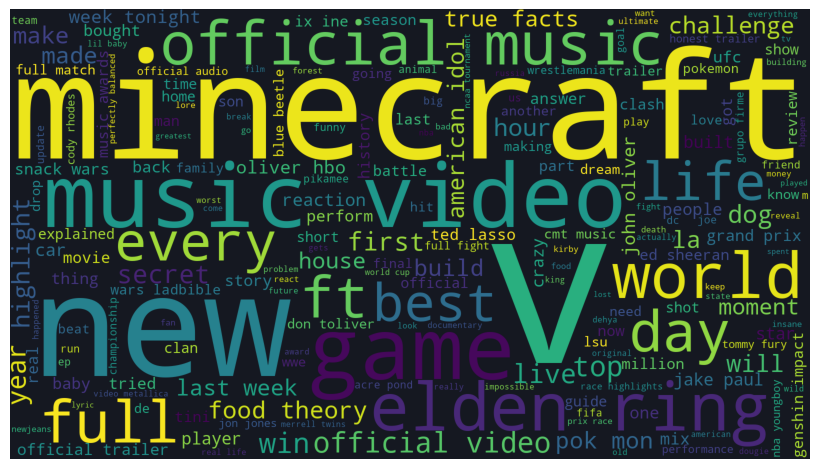

In [72]:
wordcloud = WordCloud(width = 1600, height = 900,
                      background_color ='#151821',
                      stopwords = set(STOPWORDS),
                      min_font_size = 10).generate(titles)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

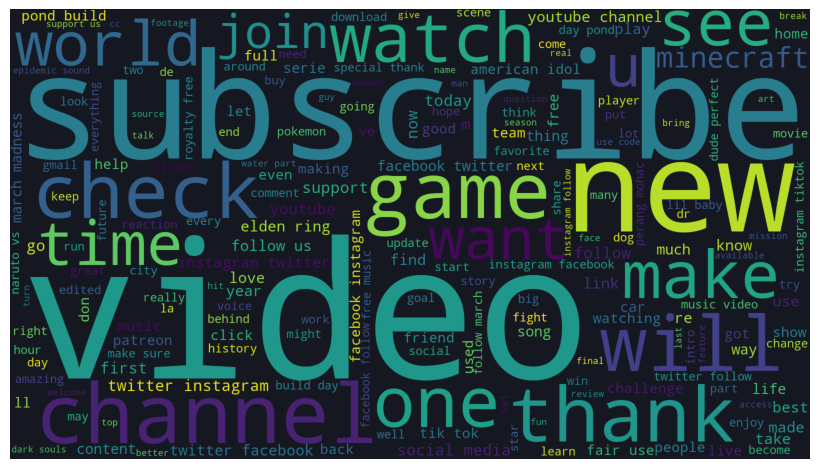

In [71]:
wordcloud = WordCloud(width = 1600, height = 900,
                      background_color ='#151821',
                      stopwords = set(STOPWORDS),
                      min_font_size = 10).generate(descriptions)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()